## Exploratory Data Analysis


### Before creating a classification algorithm, it is essential to understand the dataset better. The distribution of the different labels, image dimensions and color modes will affect how the data preprocessing will be done to ensure that the classifying neural network will receive consistent input.

In [7]:
import os
import matplotlib.pyplot as plt
import random
from PIL import Image
import numpy as np

The dataset structure is as follows: The root folder contains folders labeled according to different architectural styles. Each of these folders then contains images of buildings representative of the style indicated by the folder name. Now, let's see how many distinct styles we are dealing with:

In [4]:
## Set the path to the dataset
DATA_PATH = 'architectural-styles-dataset'  # Replace with your dataset path

## Get the list of architectural styles (folders in the directory)
styles = [folder for folder in os.listdir(DATA_PATH) if not folder.startswith('.')]
print(f"Found {len(styles)} architectural styles: {styles}")

Found 25 architectural styles: ['Palladian architecture', 'Novelty architecture', 'International style', 'Chicago school architecture', 'Beaux-Arts architecture', 'Ancient Egyptian architecture', 'Gothic architecture', 'Tudor Revival architecture', 'Romanesque architecture', 'Colonial architecture', 'American craftsman style', 'Greek Revival architecture', 'Queen Anne architecture', 'Baroque architecture', 'Edwardian architecture', 'Art Nouveau architecture', 'Deconstructivism', 'Bauhaus architecture', 'Georgian architecture', 'Byzantine architecture', 'Postmodern architecture', 'Achaemenid architecture', 'Art Deco architecture', 'American Foursquare architecture', 'Russian Revival architecture']


Alright! We have 25 different architectural styles, spanning from the ancient Achaemenid style to the ultra-modern deconstructivism. Now we need to know how many images each style folder contains. This is important to know, since class imbalances can affect the performance of a classifier model, and knowing the distribution can help in diagnosing any problems in the accuracy of the model. First, let's create a dictionary with the architectural styles as keys and the respective number of images as values. Then, we can visualize how the numbers are distributed.

In [25]:
style_counts = {}
for style in styles:
    style_counts[style] = len(os.listdir(os.path.join(DATA_PATH, style)))
    
average_images_per_style = sum(style_counts.values()) / len(style_counts)

print(f"Average number of images per style: {int(average_images_per_style)}")


Average number of images per style: 404


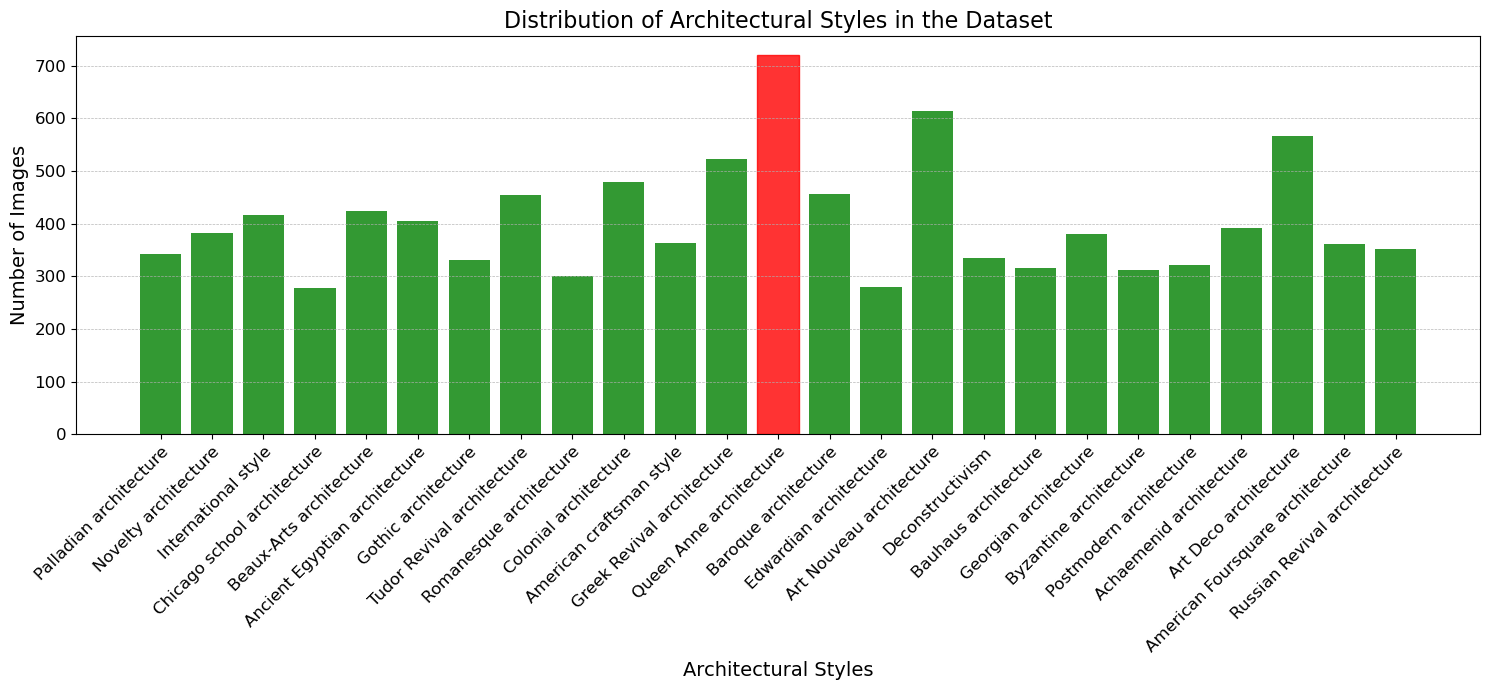

In [30]:
# Set the figure size and color for the bars
plt.figure(figsize=(15, 7))
color = 'green' 

# Plot the data
bars = plt.bar(style_counts.keys(), style_counts.values(), color=color, alpha=0.8)

# Highlight the bar with the highest value
max_val = max(style_counts.values())
bars[np.argmax(list(style_counts.values()))].set_color('red')

# Set labels, title, and add grid
plt.xlabel('Architectural Styles', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12, rotation_mode='anchor')
plt.yticks(fontsize=12)
plt.title('Distribution of Architectural Styles in the Dataset', fontsize=16)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.9)

# Use tight layout to ensure everything fits
plt.tight_layout()

# Display the graph
plt.show()


In [17]:
# Initialize variables
dimensions = set()
color_types = set()
dimension_distribution = {}

# Analyze images
for style in styles:
    for image_file in os.listdir(os.path.join(DATA_PATH, style)):
        if not image_file.startswith('.'):
            image_path = os.path.join(DATA_PATH, style, image_file)
            with Image.open(image_path) as img:
                dimensions.add(img.size)
                color_types.add(img.mode)
                
                # Distribution of dimensions
                if img.size in dimension_distribution:
                    dimension_distribution[img.size] += 1
                else:
                    dimension_distribution[img.size] = 1

print(f"Unique image dimensions in dataset: {len(dimensions)}")
print(f"Image color modes in dataset: {color_types}")



Unique image dimensions in dataset: 3344
Image color modes in dataset: {'RGB', 'L', 'CMYK'}


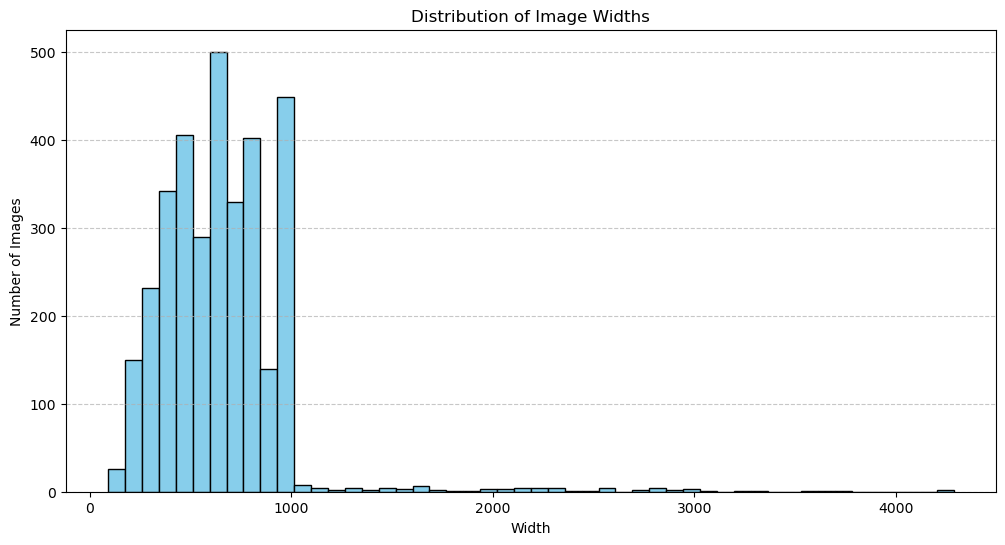

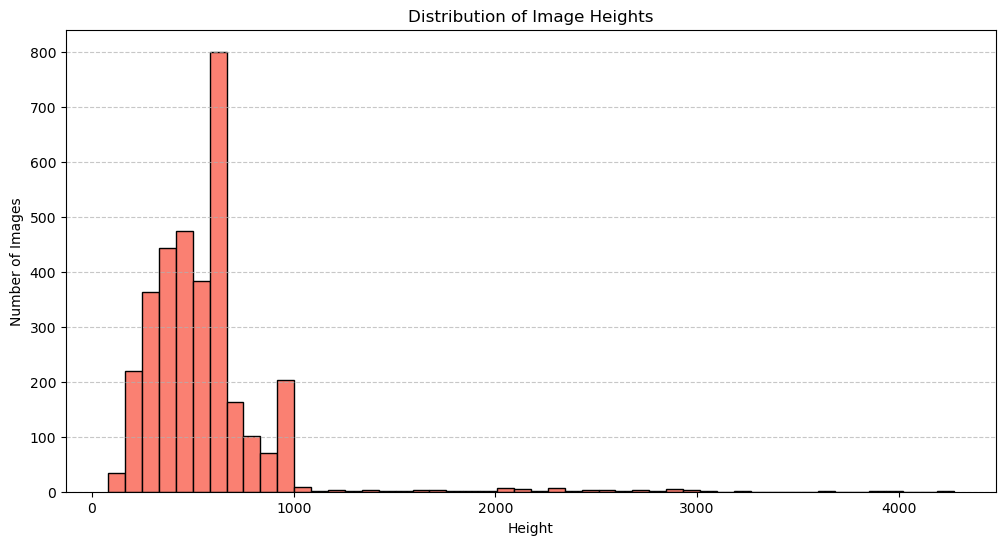

In [18]:
import matplotlib.pyplot as plt

# Continue from the code provided earlier

# Separate out widths and heights from the dimensions
widths = [dim[0] for dim in dimensions]
heights = [dim[1] for dim in dimensions]

# Plotting the distribution of widths
plt.figure(figsize=(12, 6))
plt.hist(widths, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Image Widths')
plt.xlabel('Width')
plt.ylabel('Number of Images')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plotting the distribution of heights
plt.figure(figsize=(12, 6))
plt.hist(heights, bins=50, color='salmon', edgecolor='black')
plt.title('Distribution of Image Heights')
plt.xlabel('Height')
plt.ylabel('Number of Images')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


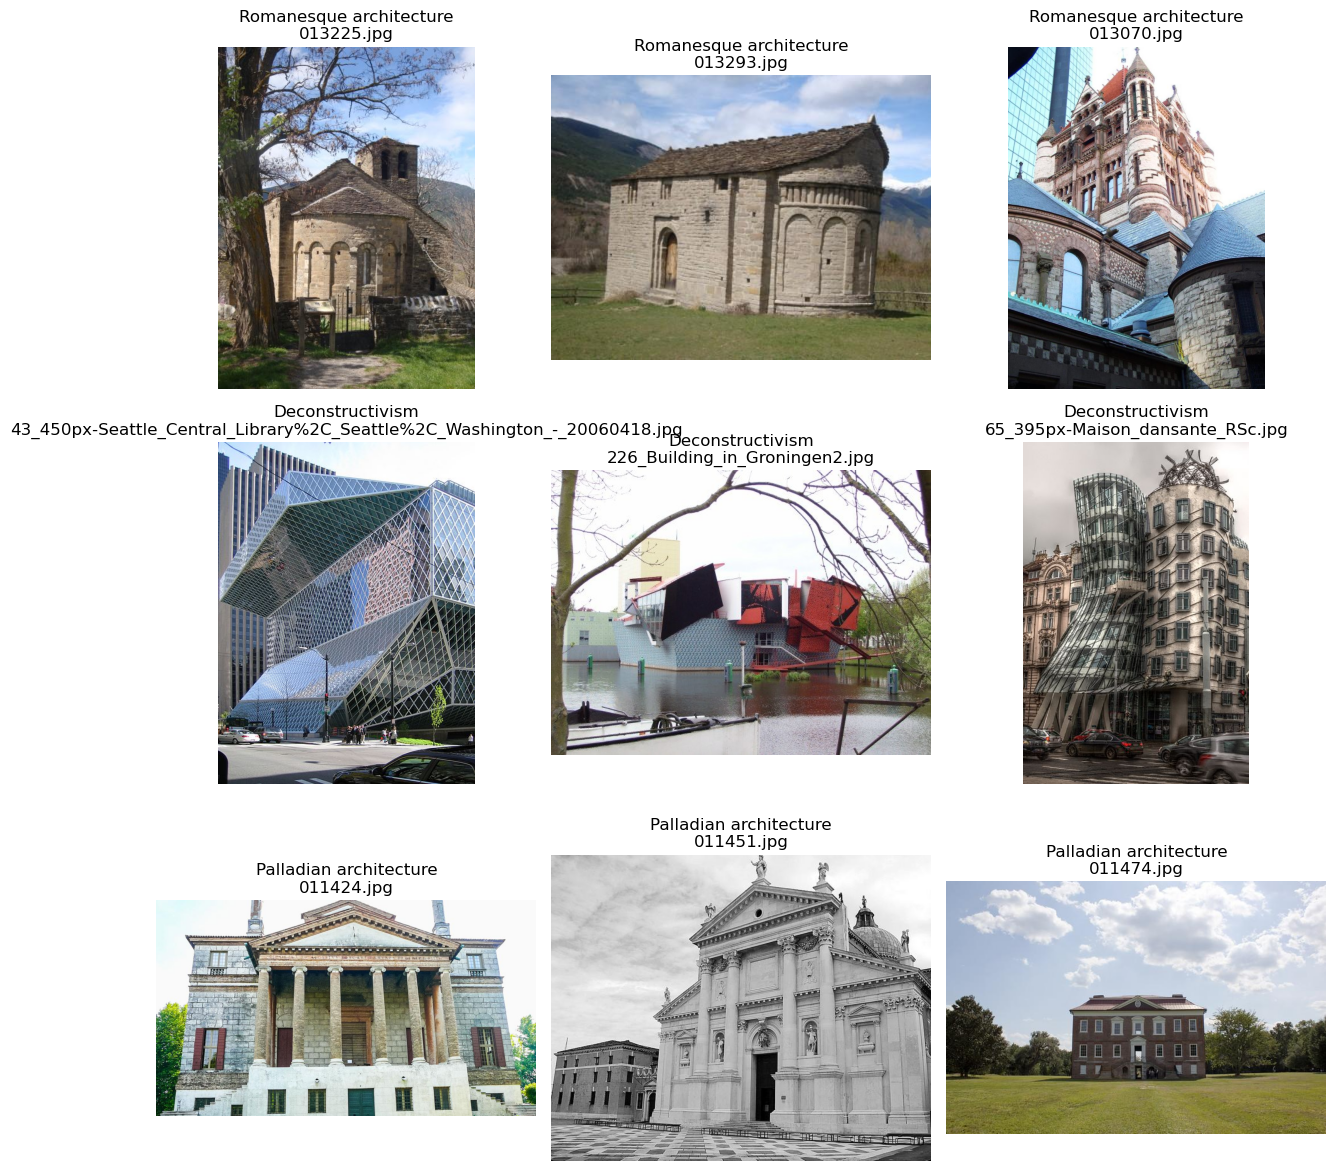

In [31]:
# Set the random seed for reproducibility
np.random.seed(42)

# List all styles
styles = [style for style in os.listdir(DATA_PATH) if not style.startswith('.')]

# Randomly select three styles
selected_styles = np.random.choice(styles, 3, replace=False)

fig, axs = plt.subplots(3, 3, figsize=(12, 12))

# Iterate over each selected style and display images
for i, style in enumerate(selected_styles):
    image_files = [f for f in os.listdir(os.path.join(DATA_PATH, style)) if not f.startswith('.')]
    selected_images = np.random.choice(image_files, 3, replace=False)
    
    for j, image_file in enumerate(selected_images):
        image_path = os.path.join(DATA_PATH, style, image_file)
        img = Image.open(image_path)
        axs[i, j].imshow(img)
        axs[i, j].set_title(f"{style}\n{image_file}")
        axs[i, j].axis('off')

plt.tight_layout()
plt.show()
